In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Plot settings
plt.style.use("seaborn-v0_8-darkgrid")  # Use the correct style name for matplotlib >= 3.6
sns.set_palette("muted")

# Load data
data_path = "../data"
tickers = ['AAPL', 'MSFT', 'JNJ', 'PFE']

data = {}
for ticker in tickers:
    file_path = os.path.join(data_path, f"{ticker}.csv")
    df = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date')
    df = df[['Close']].rename(columns={'Close': ticker})
    data[ticker] = df

# Merge all tickers into one DataFrame
df_all = pd.concat(data.values(), axis=1)
df_all.dropna(inplace=True)
df_all.head()

,AAPL,MSFT,JNJ,PFE
Date,,,,
NaT,AAPL,MSFT,JNJ,PFE
2015-01-02,24.288578033447266,39.99871063232422,78.01262664794922,19.346155166625977
2015-01-05,23.60433006286621,39.630882263183594,77.46775817871094,19.24118423461914
2015-01-06,23.606552124023438,39.04921340942383,77.08709716796875,19.401735305786133
2015-01-07,23.937578201293945,39.545345306396484,78.78886413574219,19.667253494262695


In [2]:
aapl_data = data['AAPL'].copy()

In [3]:
from statsmodels.tsa.stattools import adfuller

# Convert to numeric and drop NaN
aapl_numeric = pd.to_numeric(aapl_data['AAPL'], errors='coerce').dropna()

# ADF Test
result = adfuller(aapl_numeric)
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")


ADF Statistic: 0.8448214354741014
p-value: 0.9923262793933063


In [4]:
from statsmodels.tsa.arima.model import ARIMA

# (p,d,q) example: ARIMA(1,1,1)
model = ARIMA(aapl_numeric, order=(1, 1, 1))
fitted_model = model.fit()
print(fitted_model.summary())

c:\Users\GODIWOUR\AppData\Local\anaconda\envs\stock_forecast\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\GODIWOUR\AppData\Local\anaconda\envs\stock_forecast\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\GODIWOUR\AppData\Local\anaconda\envs\stock_forecast\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\GODIWOUR\AppData\Local\anaconda\envs\stock_forecast\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning

                               SARIMAX Results                                
Dep. Variable:                   AAPL   No. Observations:                 2515
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -5215.294
Date:                Mon, 16 Jun 2025   AIC                          10436.587
Time:                        15:42:59   BIC                          10454.076
Sample:                             0   HQIC                         10442.935
                               - 2515                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5412      0.373      1.452      0.146      -0.189       1.272
ma.L1         -0.5617      0.368     -1.525      0.127      -1.284       0.160
sigma2         3.7103      0.053     70.230      0.0

c:\Users\GODIWOUR\AppData\Local\anaconda\envs\stock_forecast\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\GODIWOUR\AppData\Local\anaconda\envs\stock_forecast\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


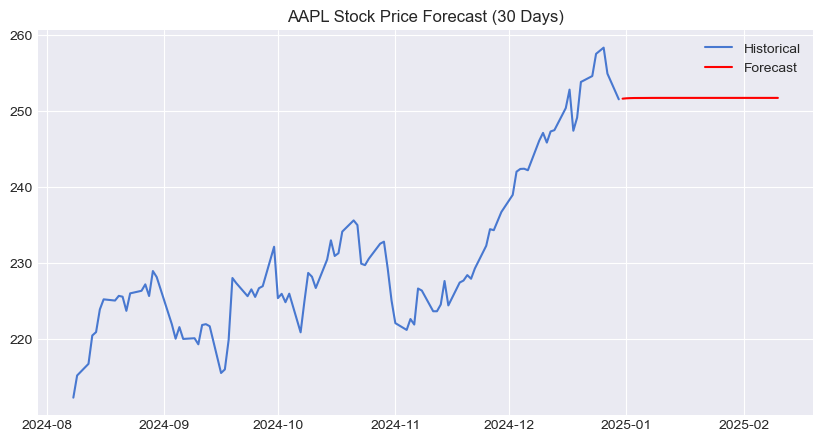

In [6]:
import os

# Use the last valid date in the index (excluding NaT)
# Ensure the results directory exists
os.makedirs("results", exist_ok=True)

last_valid_date = aapl_data.index[aapl_data.index.notnull()][-1]
forecast = fitted_model.forecast(steps=30)
forecast.index = pd.date_range(start=last_valid_date, periods=31, freq='B')[1:]  # Business days

# Save forecast to CSV
forecast.to_csv("results/aapl_forecast.csv", header=True)

plt.figure(figsize=(10, 5))
plt.plot(aapl_numeric.iloc[-100:], label="Historical")
plt.plot(forecast, label="Forecast", color='red')
plt.title("AAPL Stock Price Forecast (30 Days)")
plt.legend()
plt.show()